# Homework 03 - Nonstandard Evaluation and Git

## Nonstandard Evaluation


### Question 1
Imagine we have a data frame called `data`, with a `type` column. Which one works and why?\
Function 1:
```
group_and_tally <- function(df, column){
    df %>% group_by({{ column }}) %>% tally();
}
group_and_tally(data, type);
```

Function 2:
```
group_and_tally <- function(df, column){
    df %>% group_by(column) %>% tally();
}
group_and_tally(data, type);
```

- Function 1 works because it designates to group by the column of a speciifc type due to the use of the {{}}. Function 2 does not work because it tries to group by a variable names column as opposed to specific columns of the given type.

## Git
For the questions below, please add the commands you used to complete these steps.

### Question 2
Set up your git repo on your local computer. If you already make a git repo on GitHub, but it isn’t on your local computer - clone it.

- The command I used was git clone: git clone https://github.com/jrshah1/bios512

### Question 3
Set up your SSH key.

- The command I used was ssh-keygen -t ed25519 -C "jrshah@ad.unc.edu" in my computer terminal.
- I then selected and entered a passkey.

### Question 4
a) Add a HW2 directory to your git repo through the terminal with a HW.md file that says "This is for homework 2."


- I used the commands:
- mkdir HW2
- echo "This is for homework 2." > HW2/HW2.md


b) *Add* HW2.md to the staging area. Then, use the command to see which files have been modified, staged for commit, or are untracked. What does it show?
They should copy paste the terminal response after git status, and show that key used the commands below.

- Command:

    git add HW2/HW2.md

    git status


- Response:
 
  On branch main
    Your branch is up to date with 'origin/main'.

    Changes to be committed:
      (use "git restore --staged <file>..." to unstage)
    	new file:   HW2/HW2.md



c) Save file changes to the main branch.

- git commit -m "Add HW2 directory and HW2.md"

d) Now, edit the HW2.md file to give it a title.

- nano HW2/HW2.md
- I then added the title "#Homework 2"

e) Use the command that compares current, unsaved changes to the main branch. What does it say?

- command: git diff
- response:

    diff --git a/HW2/HW2.md b/HW2/HW2.md

      index 1a010d3..7bdaeb0 100644

      --- a/HW2/HW2.md

      +++ b/HW2/HW2.md

      @@ -1 +1,2 @@

      +#Homework 2

      This is for homework 2.

f) Use the command that checks the status of the working directory and the staging area *again*. What does it say?

- Command: git status
- Response:

    On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   HW2/HW2.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store

no changes added to commit (use "git add" and/or "git commit -a")


g) Once again, add HW2.md to the staging area and save the file changes to the main branch. Then, get use the command that gives you project history and paste the output in your homework.

- Command:

  git add HW2/HW2.md

  git commit -m "Add title to HW2.md"

  git log --oneline

  
- Response:


[main d37bd48] Add title to HW2.md
 1 file changed, 1 insertion(+)
d37bd48 (HEAD -> main) Add title to HW2.md
7a86589 Add HW2 directory and HW2.md
e223365 (origin/main, origin/HEAD) Add files via upload
3655370 Update README.md
dfdb186 Update install.R
8473745 Update install.R
f78cd9c Create apt.txt
47a3dbd Create install.R
1da3781 Create runtime.txt
b2dedb3 Create hello.R
54f3202 Update README.md
1579cb5 Initial commit


h) Do some searching... What `git` command will provide you documentation on other commands? Use that command to find documentation on `git log` and `git show`. What does `--since` mean in regards to `git log`? Copy and paste what is written in the documentation.

- Command:

    git help log

    git help show


- Since:

    --since=< date >, --after=< date >
           Show commits more recent than a specific date.

## Tidyverse

Note: Please make sure Binder is set up correctly to run this section. You can follow the instructions here: https://github.com/rjenki/BIOS512. 

**Please show your code for this section!** Before completing this section, please run the following.

In [1]:
library(tidyverse)
if (!dir.exists("intermediate")) dir.create("intermediate", recursive = TRUE)
if (!exists("mdpre")) mdpre <- function(x) { print(x) }
if (!exists("ggmd"))  ggmd  <- function(p) { print(p) }

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Question 5

Download the patient_names.csv and patient_properties.csv files from Canvas and read them into R. Manually set the date columns to be date variables. Print the first 10 observations of each.

In [2]:
patient_names <- read.csv("patient_names.csv")
patient_properties <- read.csv("patient_properties.csv")

clean_dates <- function(x, col_name) {
  if (col_name %in% c("BIRTHDATE", "DEATHDATE")) {
    x <- as.Date(x, format = "%m/%d/%y")
    x <- if_else(!is.na(x) & x > as.Date("2020-01-01"),
                 x - years(100),   # shift back 100 years
                 x)
  }
  return(x)
}

patient_names$BIRTHDATE <- as.Date(patient_names$BIRTHDATE, format = "%m/%d/%Y")
patient_names$DEATHDATE <- as.Date(patient_names$DEATHDATE, format = "%m/%d/%Y")

head(patient_names, 10)
head(patient_properties, 10)

,ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE
,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,77-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts
2,6e5ae27c-8038-7988-e2c0-25a103f01bfa,40-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts
3,8123d076-0886-9007-e956-d5864aa121a7,58-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts
4,770518e4-6133-648e-60c9-071eb2f0e2ce,28-12-25,17-09-29,Abel832,Smitham825,Boston,Massachusetts
5,f96addf5-81b9-0aab-7855-d208d3d352c5,28-12-25,14-02-23,Edwin773,Labadie908,Boston,Massachusetts
6,8e9650d1-788a-78f9-4a28-d08f7f95354a,28-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts
7,183df435-4190-060e-8f8e-bf63c572b266,57-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts
8,720560d4-51da-c38c-ee90-c15935278df1,72-06-27,NA,Lowell343,Price929,Quincy,Massachusetts
9,217851b0-5f47-d376-18b9-0fe4ba77207e,54-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts


,ID,property,value
,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,MARITAL,M
2,5605b66b-e92d-c16c-1b83-b8bf7040d51f,RACE,white
3,5605b66b-e92d-c16c-1b83-b8bf7040d51f,ETHNICITY,nonhispanic
4,5605b66b-e92d-c16c-1b83-b8bf7040d51f,GENDER,F
5,6e5ae27c-8038-7988-e2c0-25a103f01bfa,MARITAL,M
6,6e5ae27c-8038-7988-e2c0-25a103f01bfa,RACE,white
7,6e5ae27c-8038-7988-e2c0-25a103f01bfa,ETHNICITY,nonhispanic
8,6e5ae27c-8038-7988-e2c0-25a103f01bfa,GENDER,M
9,8123d076-0886-9007-e956-d5864aa121a7,MARITAL,M


### Question 6
In the data frame pulled from patient_properties, you'll notice that the data is long, not wide. Do a pivot to make the properties their own columns. Print the first 10 observations after you do so.

In [3]:
patient_prop_wide <- patient_properties %>% pivot_wider(names_from = property, values_from = value)

head(patient_prop_wide, 10)

ID,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,S,black,hispanic,M


### Question 7
Perform a left join of the names and properties_wide data frames by the ID column and print the first 10 rows.

In [4]:
patient_joined <- patient_names %>% left_join(patient_prop_wide, by="ID")

head(patient_joined, 10)

,ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,77-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts,M,white,nonhispanic,F
2,6e5ae27c-8038-7988-e2c0-25a103f01bfa,40-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts,M,white,nonhispanic,M
3,8123d076-0886-9007-e956-d5864aa121a7,58-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts,M,white,nonhispanic,M
4,770518e4-6133-648e-60c9-071eb2f0e2ce,28-12-25,17-09-29,Abel832,Smitham825,Boston,Massachusetts,M,white,hispanic,M
5,f96addf5-81b9-0aab-7855-d208d3d352c5,28-12-25,14-02-23,Edwin773,Labadie908,Boston,Massachusetts,M,white,hispanic,M
6,8e9650d1-788a-78f9-4a28-d08f7f95354a,28-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts,M,white,hispanic,M
7,183df435-4190-060e-8f8e-bf63c572b266,57-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts,M,asian,nonhispanic,F
8,720560d4-51da-c38c-ee90-c15935278df1,72-06-27,NA,Lowell343,Price929,Quincy,Massachusetts,M,white,nonhispanic,M
9,217851b0-5f47-d376-18b9-0fe4ba77207e,54-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts,S,black,hispanic,M


### Question 8
Notice something interesting about the names in our data set. Fix the name formatting and print the first 10 observations.

In [5]:
patient_joined <- patient_joined %>% mutate(FIRST = substr(FIRST, 1, nchar(FIRST) - 3))
patient_joined <- patient_joined %>% mutate(LAST = substr(LAST, 1, nchar(LAST) - 3))

head(patient_joined, 10)

,ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,77-03-19,NA,Nikita,Erdman,Quincy,Massachusetts,M,white,nonhispanic,F
2,6e5ae27c-8038-7988-e2c0-25a103f01bfa,40-02-19,NA,Zane,Hodkiewicz,Boston,Massachusetts,M,white,nonhispanic,M
3,8123d076-0886-9007-e956-d5864aa121a7,58-06-04,NA,Quinn,Marquardt,Quincy,Massachusetts,M,white,nonhispanic,M
4,770518e4-6133-648e-60c9-071eb2f0e2ce,28-12-25,17-09-29,Abel,Smitham,Boston,Massachusetts,M,white,hispanic,M
5,f96addf5-81b9-0aab-7855-d208d3d352c5,28-12-25,14-02-23,Edwin,Labadie,Boston,Massachusetts,M,white,hispanic,M
6,8e9650d1-788a-78f9-4a28-d08f7f95354a,28-12-25,NA,Frankie,Oberbrunner,Boston,Massachusetts,M,white,hispanic,M
7,183df435-4190-060e-8f8e-bf63c572b266,57-11-08,NA,Eilene,Walsh,Cambridge,Massachusetts,M,asian,nonhispanic,F
8,720560d4-51da-c38c-ee90-c15935278df1,72-06-27,NA,Lowell,Price,Quincy,Massachusetts,M,white,nonhispanic,M
9,217851b0-5f47-d376-18b9-0fe4ba77207e,54-03-06,NA,Adrian,Gleason,Boston,Massachusetts,S,black,hispanic,M


### Question 9
Using a for statement to loop through the categorical variables (excluding name and ID), print the counts of each unique value in descending order, using the mdpre() function for formatting.

In [6]:
for (var in names(patient_joined)[!names(patient_joined) %in% c("FIRST", "LAST", "ID")]) {
  if (is.character(patient_joined[[var]]) || is.factor(patient_joined[[var]])) {
    counts <- sort(table(patient_joined[[var]]), decreasing = TRUE)
    cat("\nCounts for", var, ":\n")
    mdpre(counts)
  }
}


Counts for CITY :

        Boston         Quincy      Cambridge         Revere        Chelsea 
           541             80             45             42             39 
      Weymouth     Somerville        Hingham       Winthrop      Brookline 
            37             25             22             22             17 
       Everett           Hull        Medford      Braintree       Cohasset 
            16             15             13             10             10 
        Malden       Scituate         Newton       Stoneham North Scituate 
             8              8              6              5              3 
       Reading        Belmont      Lynnfield        Melrose         Milton 
             2              1              1              1              1 
       Norwell        Waltham      Watertown     Winchester 
             1              1              1              1 

Counts for STATE :
Massachusetts 
          974 

Counts for MARITAL :

   M    S Fine male 
 782

### Question 10
If you see any weird values, get rid of the ones that don't make sense, and combine the ones that are formatted wrong. Don't forget ot check the dates! Print the new tables for categorical values, and print the date ranges.

In [7]:
patient_joined$GENDER[patient_joined$GENDER %in% c("F", "female", "Female")] <- "F"
patient_joined$GENDER[patient_joined$GENDER %in% c("Male", "M")] <- "M"

patient_joined$RACE[patient_joined$RACE %in% c("asian", "asiann")] <- "asian"
patient_joined$ETHNICITY[patient_joined$ETHNICITY %in% c("nonhispanic", "nonhispani")] <- "nonhispanic"
patient_joined$ETHNICITY[patient_joined$ETHNICITY %in% c("hispanic", "hispani")] <- "hispanic"

non_erroneous_marital <- str_split("M S", " ", simplify=TRUE);
patient_tidied <- patient_joined %>% filter(MARITAL %in% non_erroneous_marital)
patient_tidied

for (var in names(patient_tidied)[!names(patient_tidied) %in% c("FIRST", "LAST", "ID")]) {
  if (is.character(patient_tidied[[var]]) || is.factor(patient_tidied[[var]])) {
    counts <- sort(table(patient_tidied[[var]]), decreasing = TRUE)
    cat("\nCounts for", var, ":\n")
    mdpre(counts)
  }
}


for (var in names(patient_tidied)) {
  if (inherits(patient_tidied[[var]], "Date")) {
    cat("\nDate range for", var, ":\n")
    print(range(patient_tidied[[var]], na.rm = TRUE))
  }
}

ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,77-03-19,NA,Nikita,Erdman,Quincy,Massachusetts,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,40-02-19,NA,Zane,Hodkiewicz,Boston,Massachusetts,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,58-06-04,NA,Quinn,Marquardt,Quincy,Massachusetts,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,28-12-25,17-09-29,Abel,Smitham,Boston,Massachusetts,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,28-12-25,14-02-23,Edwin,Labadie,Boston,Massachusetts,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,28-12-25,NA,Frankie,Oberbrunner,Boston,Massachusetts,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,57-11-08,NA,Eilene,Walsh,Cambridge,Massachusetts,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,72-06-27,NA,Lowell,Price,Quincy,Massachusetts,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,54-03-06,NA,Adrian,Gleason,Boston,Massachusetts,S,black,hispanic,M



Counts for CITY :

        Boston         Quincy      Cambridge         Revere        Chelsea 
           539             79             45             42             39 
      Weymouth     Somerville        Hingham       Winthrop      Brookline 
            37             25             22             22             17 
       Everett           Hull        Medford      Braintree       Cohasset 
            16             15             13             10             10 
        Malden       Scituate         Newton       Stoneham North Scituate 
             8              8              6              5              3 
       Reading        Belmont      Lynnfield        Melrose         Milton 
             2              1              1              1              1 
       Norwell        Waltham      Watertown     Winchester 
             1              1              1              1 

Counts for STATE :
Massachusetts 
          971 

Counts for MARITAL :

  M   S 
782 189 

Counts

### Question 11
Make a histogram of the ages of patients by gender. 

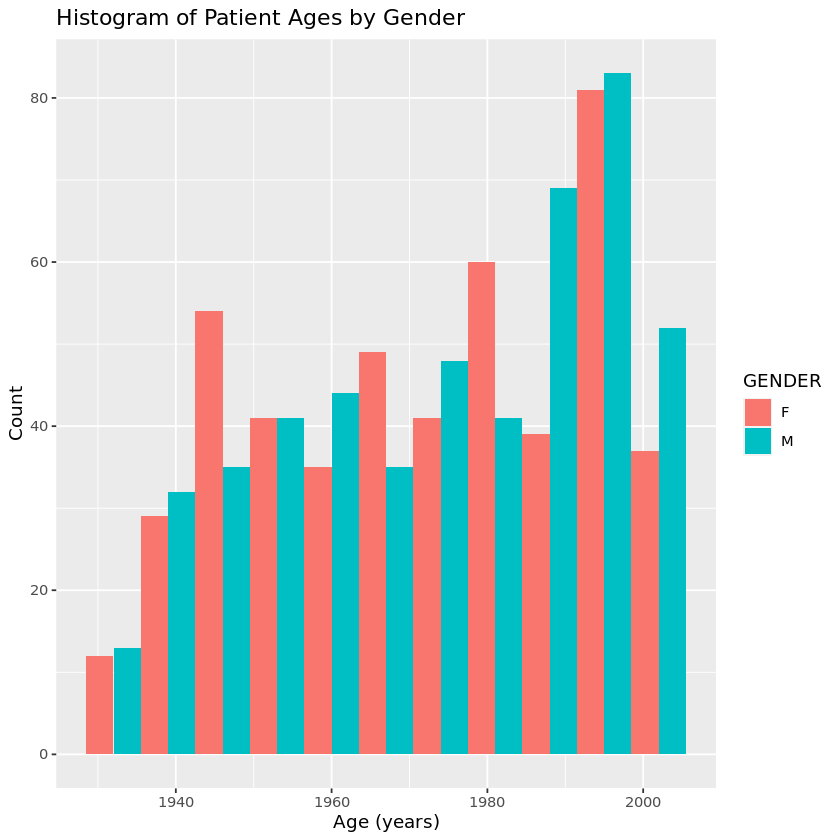

In [22]:
patient_tidied$age <- as.integer(floor(interval(patient_tidied$BIRTHDATE, Sys.Date()) / years(1)))

ggplot(patient_tidied, aes(x = age, fill = GENDER)) +
  geom_histogram(binwidth = 7, position="dodge") +
  labs(title = "Histogram of Patient Ages by Gender",
       x = "Age (years)", y = "Count") 

### Question 12
Make a scatterplot of birthdate by martial status.

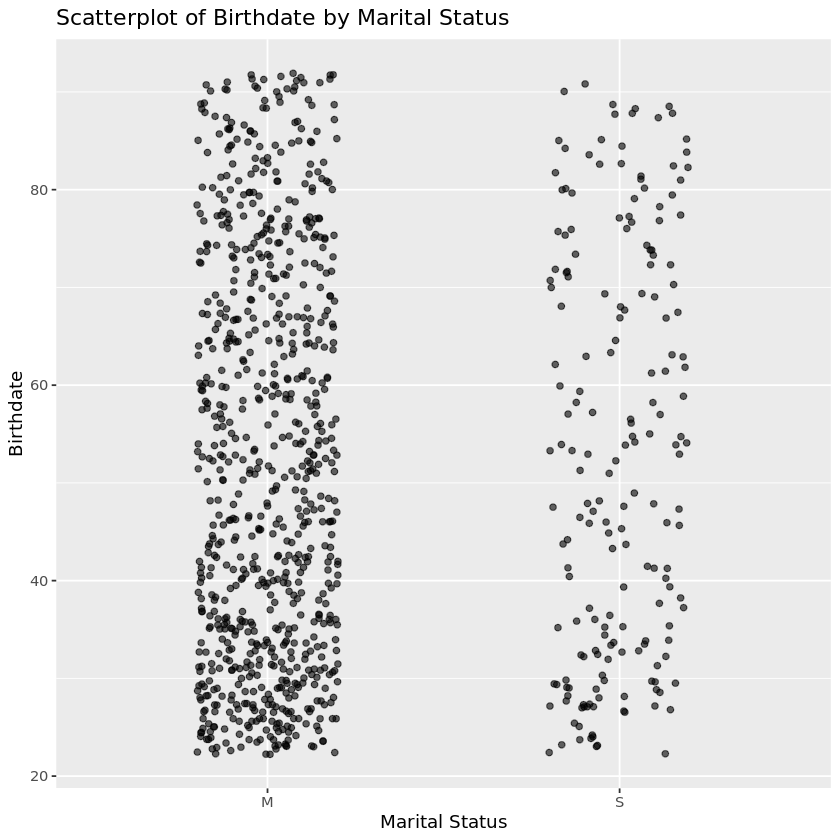

In [31]:
ggplot(patient_tidied, aes(x = MARITAL, y = BIRTHDATE)) +
  geom_jitter(width=0.2, alpha = 0.6) +
  labs(title = "Scatterplot of Birthdate by Marital Status", x = "Marital Status", y = "Birthdate") 